In [61]:
import pandas as pd
#import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

## Step 1: Data Gathering

In [62]:
wine_data = pd.read_csv('redwine_quality.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Rename the column names 

In [116]:

wine_dataa = wine_data.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid',
                         'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'})
wine_dataa.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [117]:
wine_dataa.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Data Cleaning and Exploration using Pandas

#### It is important to note that the data has 240 duplicated rows, so we would remove this values to ensure clean and accurate data

##### Can be checked using Pandas Profiling


In [118]:
wine_dataa['pH'].unique()


array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

In [119]:
wine_dataa.count()

fixed_acidity           1599
volatile_acidity        1599
citric_acid             1599
residual_sugar          1599
chlorides               1599
free_sulfur_dioxide     1599
total_sulfur_dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

### Check for null values if any

In [159]:

wine_dataa.info()
wine_dataa.isnull().any() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [121]:
wine_dataa.describe() 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Explore features in the dataset


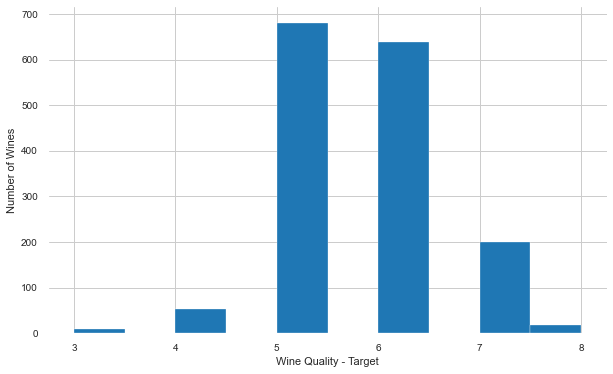

In [122]:
plt.figure(figsize=(10,6))
plt.hist(wine_dataa['quality'])
plt.xlabel('Wine Quality - Target')
plt.ylabel('Number of Wines')
plt.show()

In [123]:
wine_dataa['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

## Correlation

## $$\rho _{XY} = corr(X,Y)$$

## $$ -1.0 \leq \rho _(XY) \leq +1.0 $$



In [124]:
wine_dataa.corr().quality.sort_values()

volatile_acidity       -0.390558
total_sulfur_dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free_sulfur_dioxide    -0.050656
residual_sugar          0.013732
fixed_acidity           0.124052
citric_acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [125]:
zeromask = np.zeros_like(wine_dataa.corr()) #creates an array of zeros
triangle_indices = np.triu_indices_from(zeromask)
zeromask[triangle_indices] = True

zeromask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

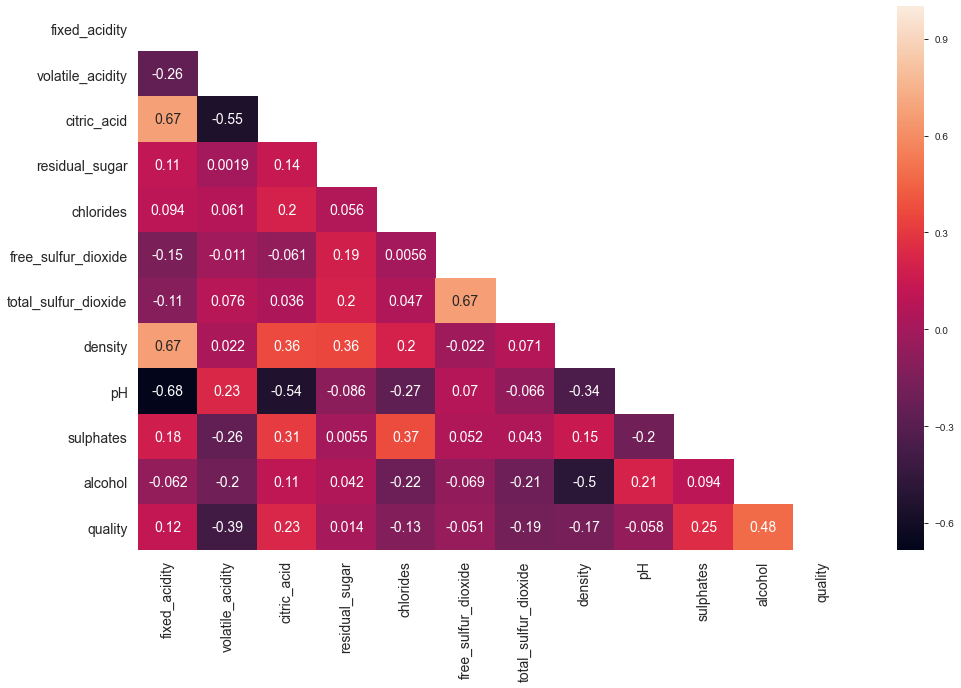

In [126]:
plt.figure(figsize=(16,10))
sns.heatmap(wine_dataa.corr(), mask=zeromask, annot=True, annot_kws={'size': 14})
sns.set_style('whitegrid')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

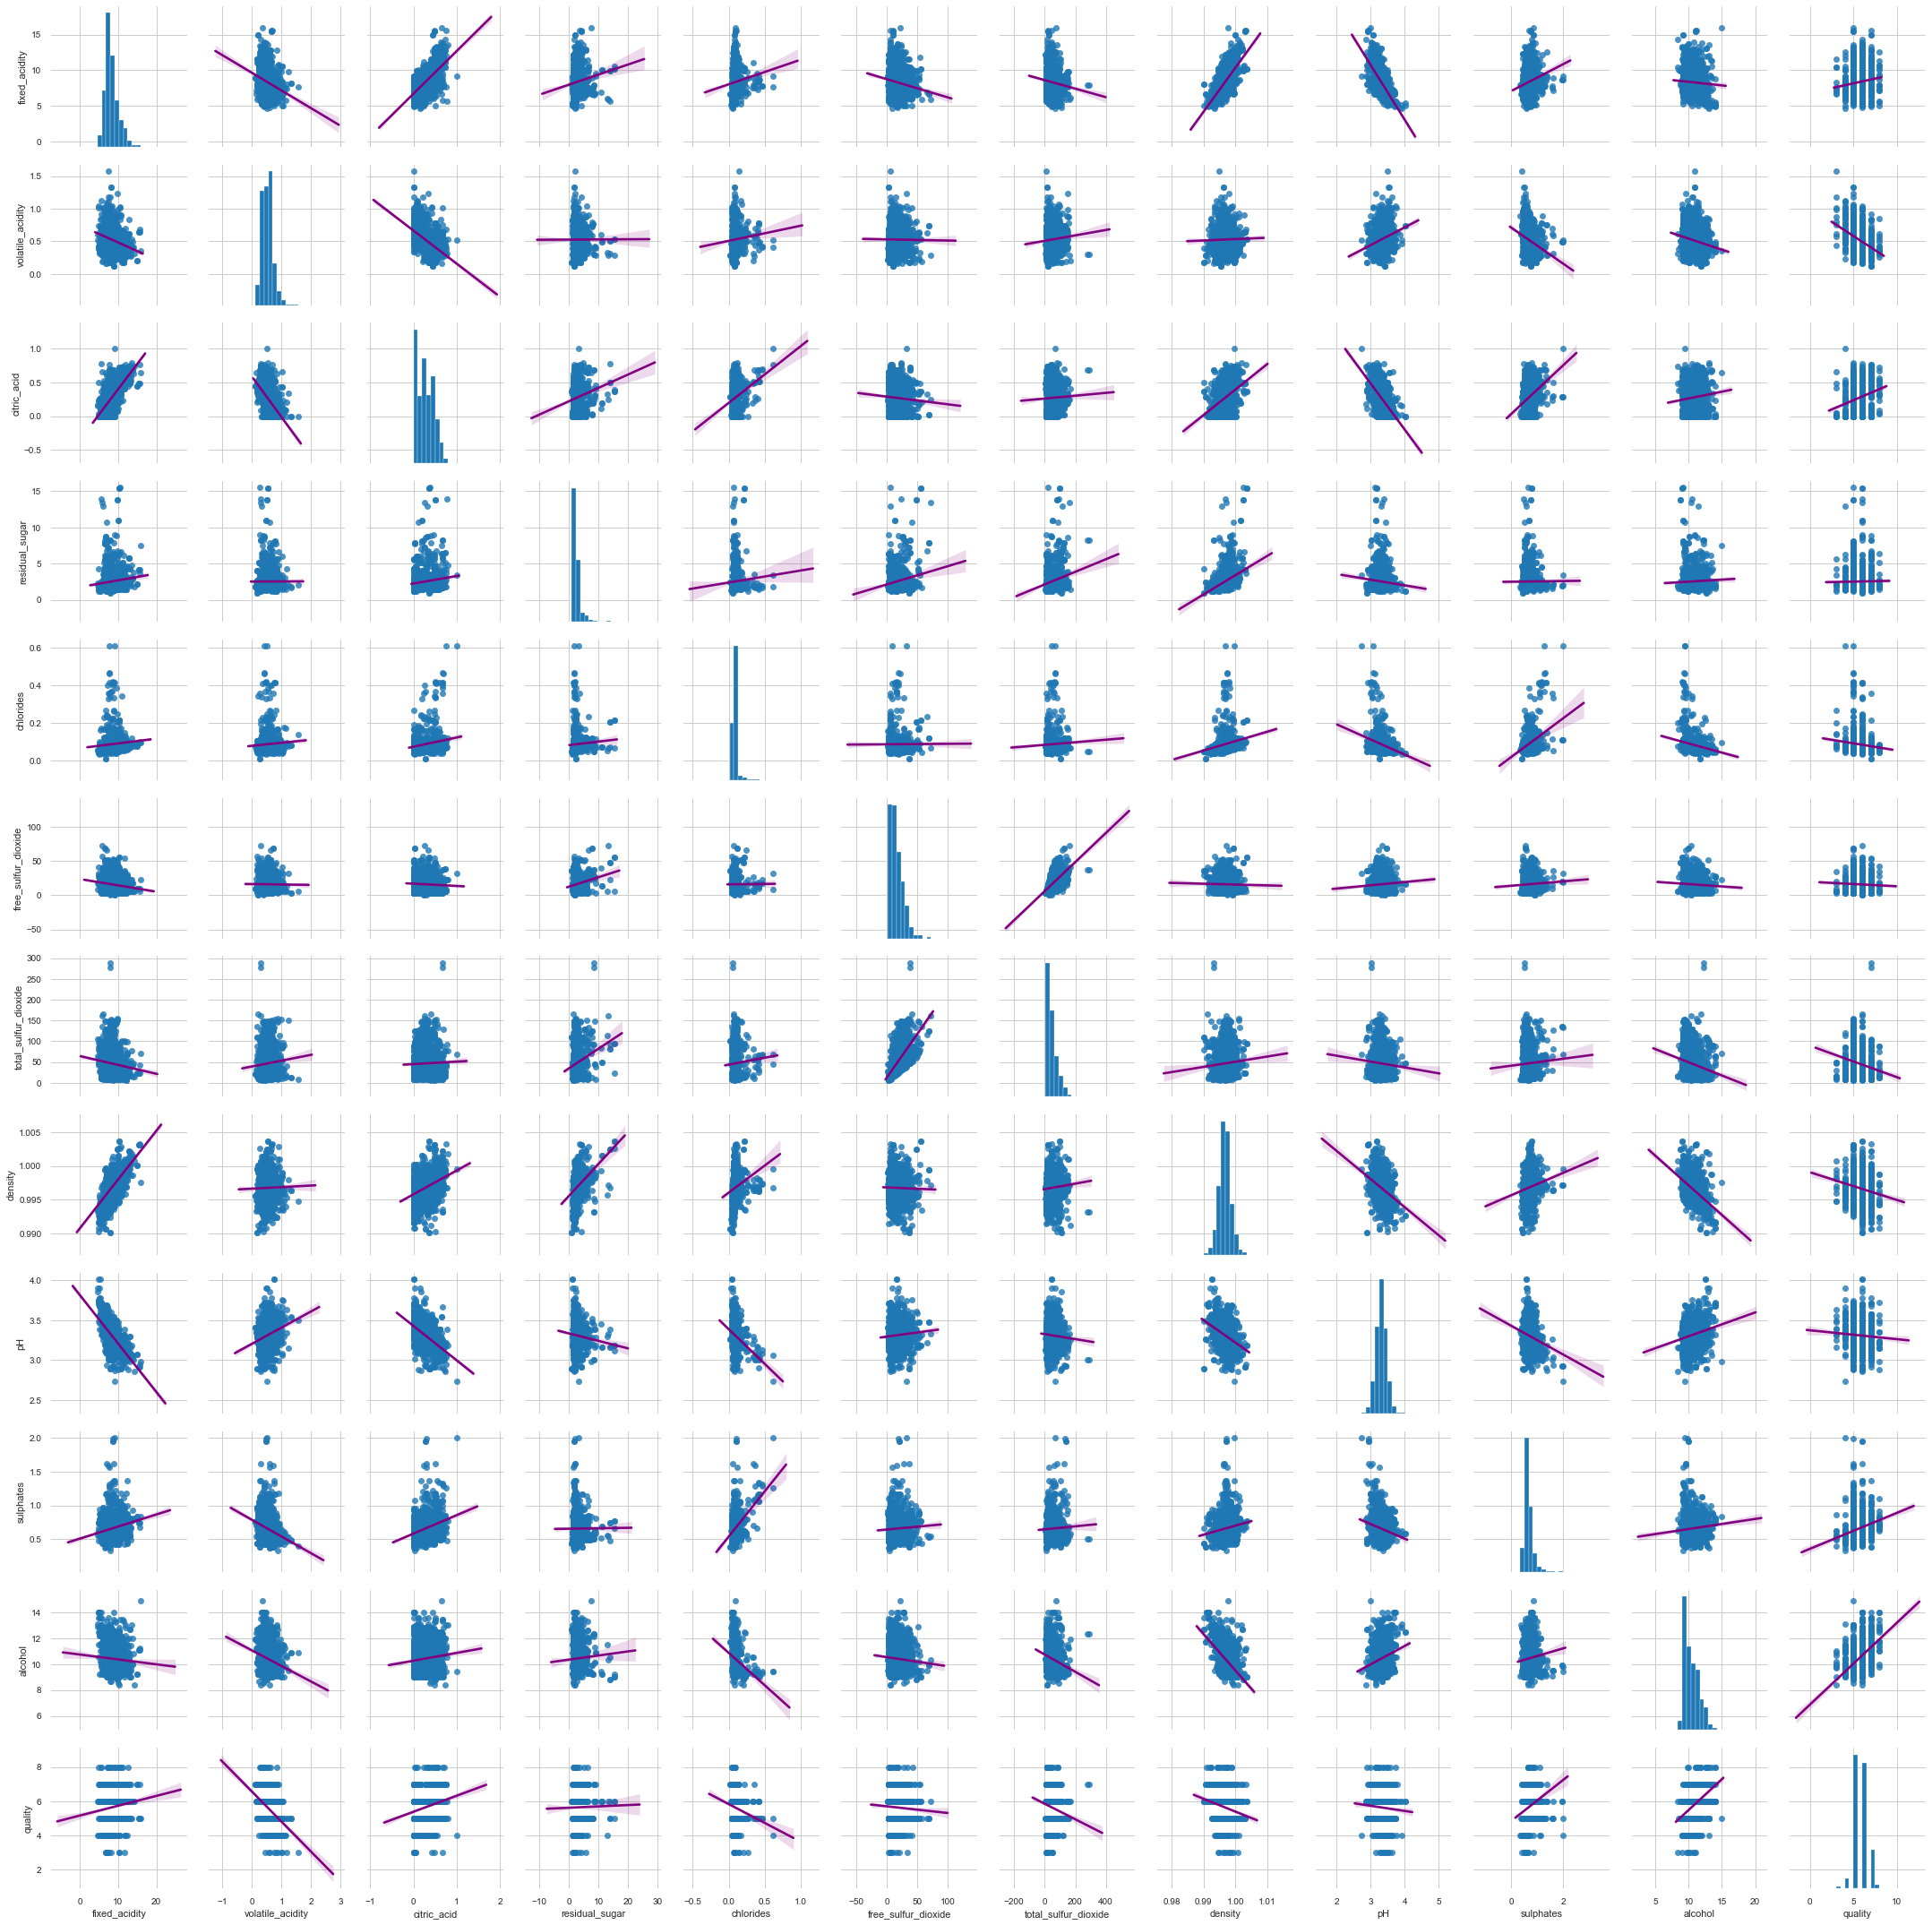

In [127]:
#%%time

sns.pairplot(wine_dataa, kind='reg', plot_kws={'line_kws':{'color':'purple'}})
plt.show()

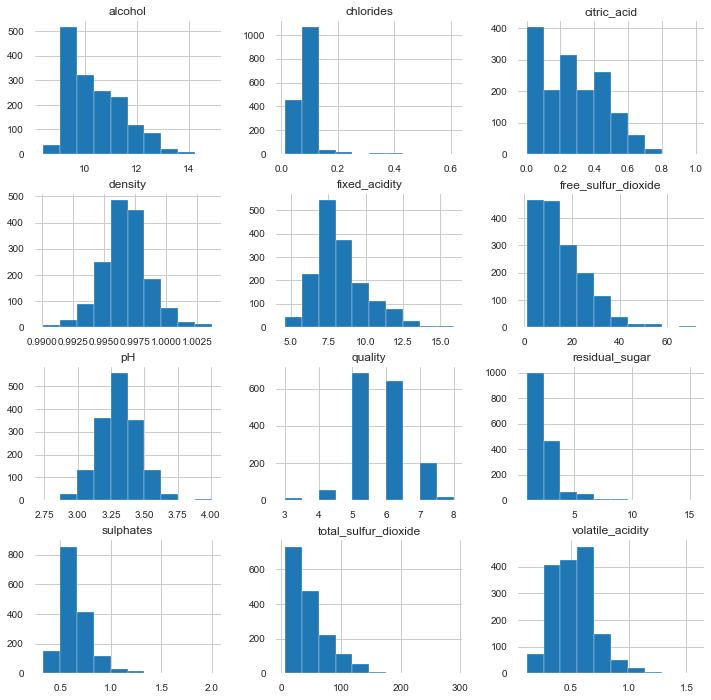

In [128]:
wine_dataa.hist(figsize=(12,12))
plt.show()

## Training and Test Dataset Split

In [129]:


quality = wine_dataa['quality']
features = wine_dataa.drop(['quality'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, quality, test_size=0.2, random_state = 10)

#% of training set
print('Train: ', len(X_train)/len(features))

# % of test data
X_test.shape[0]/features.shape[0]

Train:  0.7998749218261413


0.20012507817385866

## Multivariable Regression

In [130]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']) 

Training data r-squared: 0.35327685943218795
Test data r-squared: 0.3707576574165531
Intercept 11.080641832601424


,coef
fixed_acidity,0.021392
volatile_acidity,-1.243804
citric_acid,-0.270301
residual_sugar,0.001107
chlorides,-1.763507
free_sulfur_dioxide,0.002982
total_sulfur_dioxide,-0.003355
density,-6.774054
pH,-0.374120
sulphates,0.826384


## Data Transformation

In [132]:
wine_dataa['quality'].skew()


0.21780157547366327

## p-values and Evaluating Coefficients

In [152]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p values': round(results.pvalues, 3)})

,coef,p values
const,11.080642,0.635
fixed_acidity,0.021392,0.462
volatile_acidity,-1.243804,0.000
citric_acid,-0.270301,0.107
residual_sugar,0.001107,0.947
chlorides,-1.763507,0.000
free_sulfur_dioxide,0.002982,0.218
total_sulfur_dioxide,-0.003355,0.000
density,-6.774054,0.776
pH,-0.374120,0.079


In [158]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     62.92
Date:                Wed, 01 Jul 2020   Prob (F-statistic):          9.11e-112
Time:                        21:57:34   Log-Likelihood:                -1244.6
No. Observations:                1279   AIC:                             2513.
Df Residuals:                    1267   BIC:                             2575.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.0806 

## Formula

$$ Quality = 11.1 + 0.27Alcohol -1.76Chlorides -0.27Citric Acid - 6.77Density + 0.02Fixed Acidity + 0.0029Free Sulfur Dioxide - 0.37pH + 0.001Residual Sugar + 0.83Sulphates - 0.003Total Sulfur Dioxide - 1.24Volatile Acidity $$


## Testing for Multicollinearity

$$ FA = \alpha _0 + \alpha _1 VA + \alpha _2 CA +...+ \alpha _{10}ALCOHOL $$

$$ VIF _{FA} = \frac{1}{(1-R _{FA} ^ 2)} $$

In [134]:
#X_incl_const.shape[1]

vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(X_incl_const.shape[1])]  #empty list

pd.DataFrame({'coef_name': X_incl_const.columns,
             'vif':np.around(vif, 2)})

,coef_name,vif
0,const,1684414.66
1,fixed_acidity,7.73
2,volatile_acidity,1.79
3,citric_acid,3.21
4,residual_sugar,1.69
5,chlorides,1.54
6,free_sulfur_dioxide,1.96
7,total_sulfur_dioxide,2.21
8,density,6.14
9,pH,3.23


## Model Simplification and Bayesian Information Criterion

In [135]:
X_incl_const = sm.add_constant(X_train) 
model = sm.OLS(y_train, X_incl_const) 
results = model.fit() 

org_coef = pd.DataFrame({'coef': results.params, 'p values': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is 2575.1412744720833
r-squared is 0.353276859432188


In [142]:
#X_incl_const
X_incl_const = sm.add_constant(X_train) 
X_incl_const = X_incl_const.drop(['fixed_acidity', 'residual_sugar'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit() 

coef_minus_fix_res = pd.DataFrame({'coef': results.params, 'p values': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is 2561.4628910844963
r-squared is 0.35295858515659684


In [140]:
X_incl_const = sm.add_constant(X_train) 
X_incl_const = X_incl_const.drop(['fixed_acidity', 'residual_sugar', 'citric_acid', 'free_sulfur_dioxide'], axis=1) #Dropping the INDUS column(axis = 1)

model = sm.OLS(y_train, X_incl_const) 
results = model.fit() 

coef_minus_fix_res_cit_free = pd.DataFrame({'coef': results.params, 'p values': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is 2551.4884511290643
r-squared is 0.35076270346058236


In [141]:
frame = [org_coef, coef_minus_fix_res, coef_minus_fix_res_cit_free]
pd.concat(frame, axis=1, sort=True)

,coef,p values,coef,p values,coef,p values
alcohol,0.269015,0.000,0.278339,0.000,0.264971,0.000
chlorides,-1.763507,0.000,-1.856642,0.000,-1.969408,0.000
citric_acid,-0.270301,0.107,-0.223568,0.154,NaN,NaN
const,11.080642,0.635,-0.464288,0.972,8.603131,0.462
density,-6.774054,0.776,5.266434,0.688,-4.177663,0.717
fixed_acidity,0.021392,0.462,NaN,NaN,NaN,NaN
free_sulfur_dioxide,0.002982,0.218,0.003123,0.193,NaN,NaN
pH,-0.374120,0.079,-0.485195,0.001,-0.362404,0.007
residual_sugar,0.001107,0.947,NaN,NaN,NaN,NaN
sulphates,0.826384,0.000,0.816533,0.000,0.820180,0.000


## Distribution of Residuals - checking for normality

### Remember a normal distribution has a skew and mean of 0

The mean of the residuals -0.0
The skew of the residuals -0.13


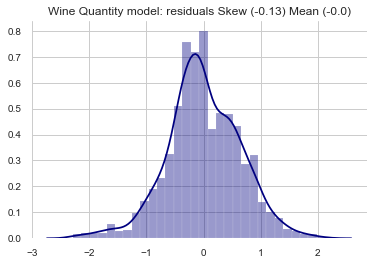

In [143]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

print('The mean of the residuals', resid_mean)
print('The skew of the residuals', resid_skew)

sns.distplot(results.resid, color='navy')
plt.title(f'Wine Quantity model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In [148]:
full_normal_mse = round(results.mse_resid, 3)
full_normal_rmse = round(np.sqrt(full_normal_mse))
full_normal_rsquared = round(results.rsquared, 3)

print("Full Normal Mean Square Error", full_normal_mse)
print("Full Normal Root Mean Square Error", full_normal_rmse)
print("Full Normal R-Squared", full_normal_rsquared)



Full Normal Mean Square Error 0.413
Full Normal Root Mean Square Error 1.0
Full Normal R-Squared 0.353
